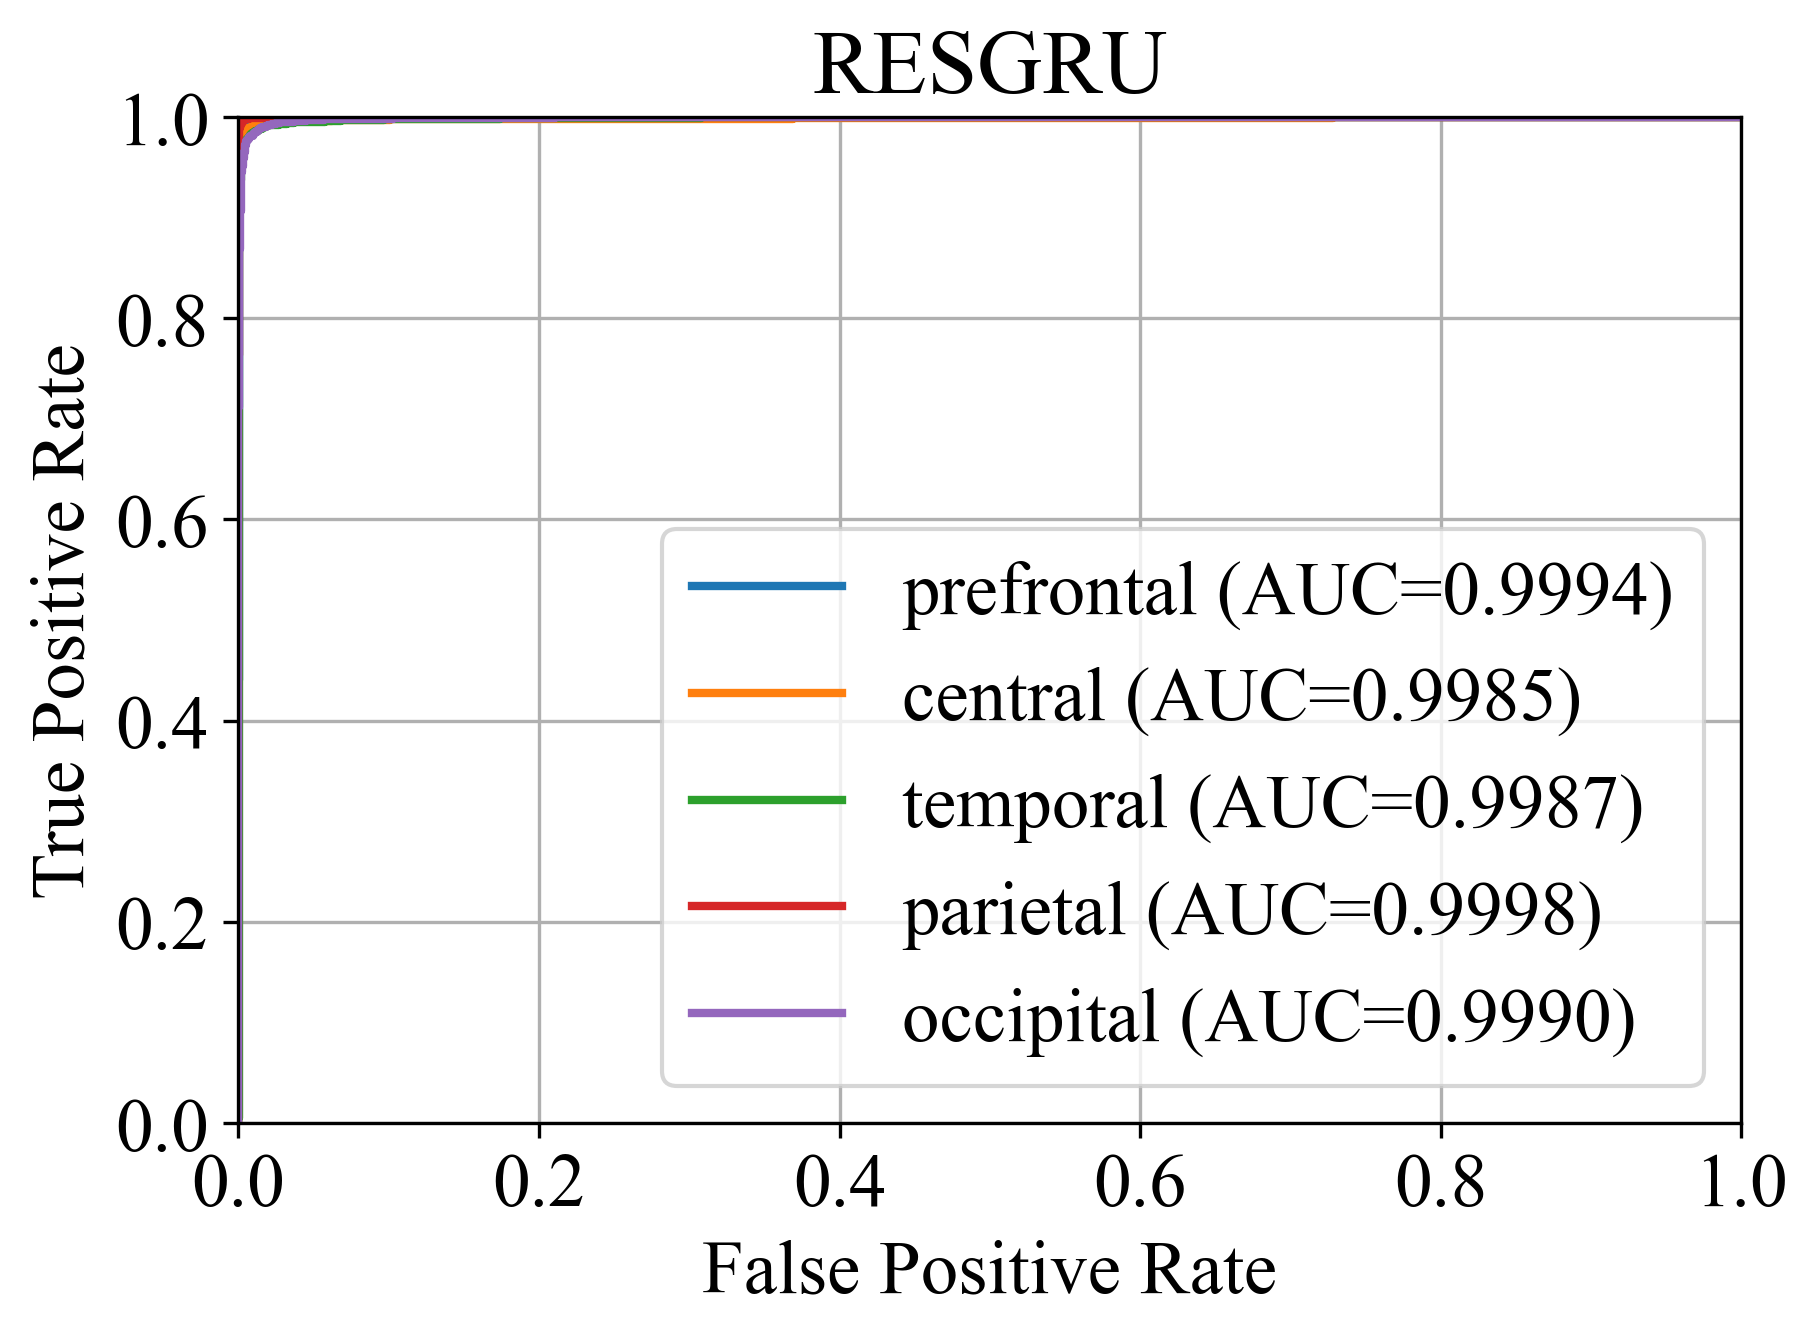

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
from sklearn.metrics import roc_curve, auc



# 需要绘制的脑区
regions = ['prefrontal', 'central', 'temporal', 'parietal', 'occipital']
model_name = 'resgru_tnb'
result_dir = f'D:/NEW_STCGRU/result/{model_name}'

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18


plt.figure(dpi=300)
for region in regions:
    csv_path = os.path.join(result_dir, f"{region}_labels_probs.csv")
    if not os.path.exists(csv_path):
        print(f"文件不存在: {csv_path}")
        continue
    df = pd.read_csv(csv_path)
    y_true = df['label'].values
    y_score = df['prob'].values
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{region} (AUC={roc_auc:.4f})')

plt.xlim([0.00, 1.0])
plt.ylim([0.00, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RESGRU')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

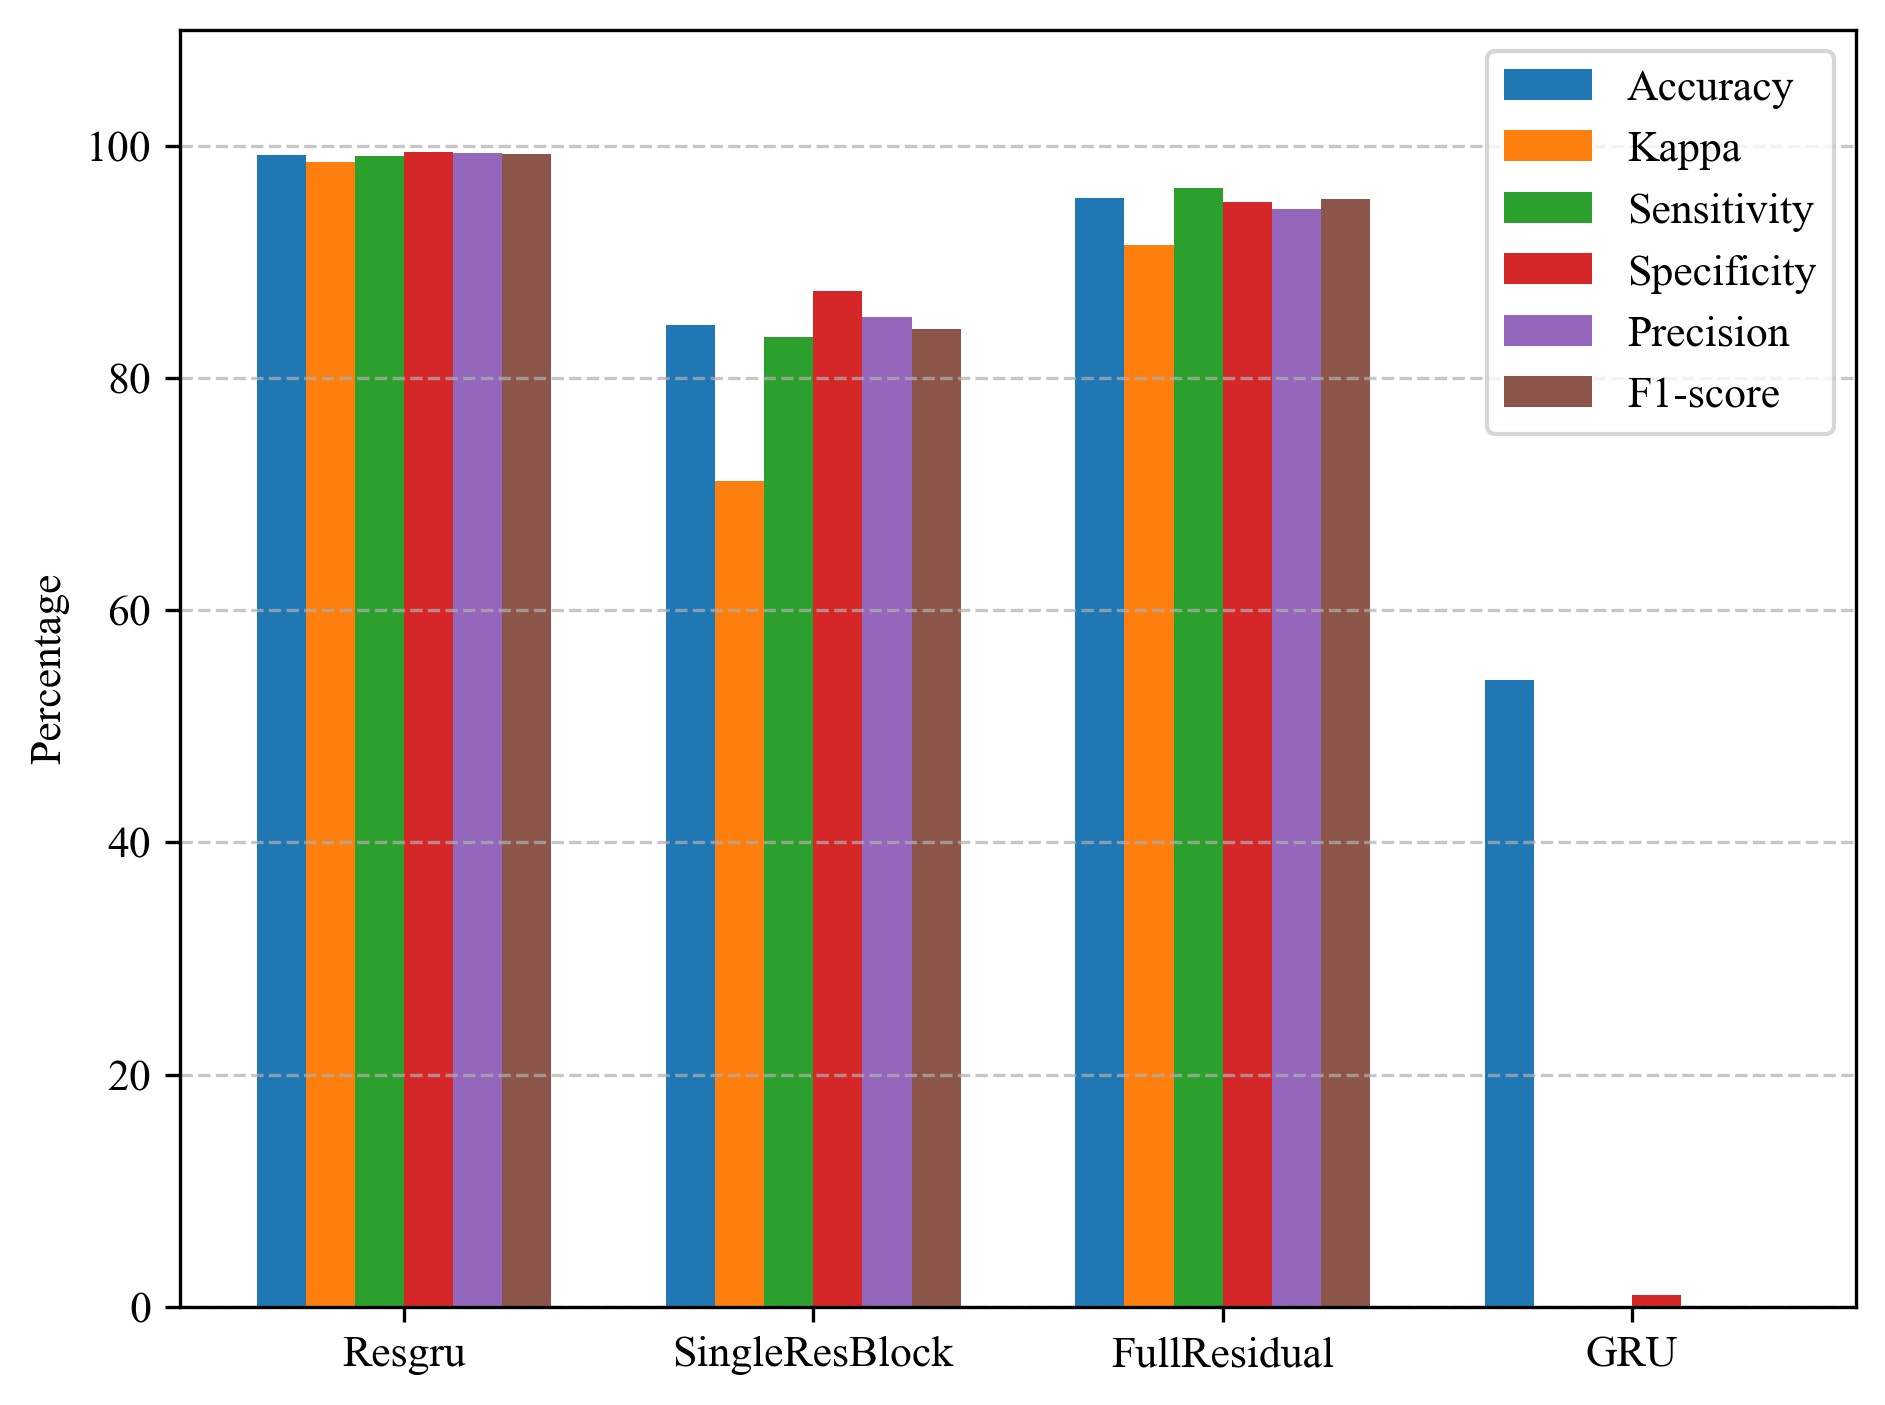

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 模型与性能指标数据
models = ['Resgru', 'SingleResBlock', 'FullResidual', 'GRU']
accuracy = [99.23, 84.54, 95.52, 53.98]
kappa = [98.60, 71.10, 91.43, 0]
sensitivity = [99.14, 83.51, 96.39, 0]
specificity = [99.44, 87.50, 95.15, 1]
precision = [99.36, 85.20, 94.53, 0]
f1_score = [99.25, 84.24, 95.44, 0]

# 各项指标
metrics = ['Accuracy', 'Kappa', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']
values = [accuracy, kappa, sensitivity, specificity, precision, f1_score]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10.5

# 绘图参数
x = np.arange(len(models))  # 模型位置
width = 0.12  # 每个柱子的宽度

# 创建图形
plt.figure(dpi=300)

# 绘制每种指标的柱状图
for i, (metric, val) in enumerate(zip(metrics, values)):
    plt.bar(x + i * width, val, width, label=metric, color=colors[i])

# 设置图表属性
plt.xticks(x + width * 2.5, models)
plt.ylabel('Percentage')
plt.ylim(0, 110)
# plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 显示图形
plt.show()
